___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [177]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [178]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [179]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [180]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, stratify=y_train ,test_size=0.10, random_state=24)

In [182]:
print(f'''
X_train Shape is {x_train.shape}
X_test Shape is {x_test.shape}
y_train Shape is {y_train.shape}
y_test Shape is {y_test.shape}
X_val Shape is {x_val.shape}
y_val Shape is {y_val.shape}
''')


X_train Shape is (54000, 28, 28)
X_test Shape is (10000, 28, 28)
y_train Shape is (54000,)
y_test Shape is (10000,)
X_val Shape is (6000, 28, 28)
y_val Shape is (6000,)



In [183]:
from collections import Counter

print(f'''
y_train classes distribution: {Counter(y_train)}
y_test classes distribution: {Counter(y_test)}
y_val classes distribution: {Counter(y_val)}
''')



y_train classes distribution: Counter({8: 5400, 1: 5400, 4: 5400, 5: 5400, 6: 5400, 0: 5400, 9: 5400, 7: 5400, 3: 5400, 2: 5400})
y_test classes distribution: Counter({9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000})
y_val classes distribution: Counter({4: 600, 7: 600, 2: 600, 6: 600, 3: 600, 8: 600, 0: 600, 9: 600, 1: 600, 5: 600})



**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [184]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

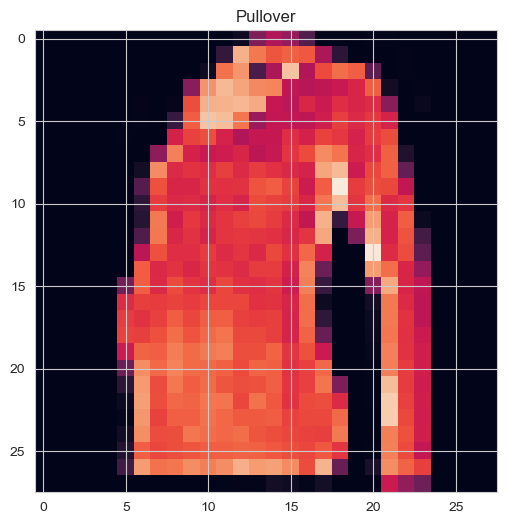

In [185]:
plt.imshow(x_train[24])
plt.title(classes[y_train[24]])
plt.show()

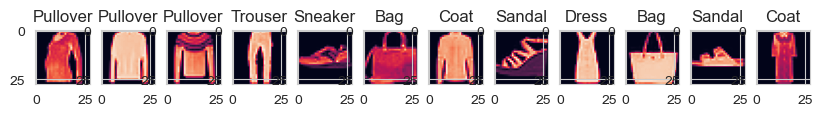

In [186]:
start , end = 24 , 36
for i in range(start, end):
    plt.subplot(1, end - start, i - start+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])

plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [187]:
print(f'''
Max Values Train: {x_train.max()}
Min Values Train: {x_train.min()}
''')



Max Values Train: 255
Min Values Train: 0



In [188]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/255.0

In [189]:
print(f"Max Values Train: {x_train.max()}\nMin Values Train: {x_train.min()}\n")


Max Values Train: 1.0
Min Values Train: 0.0



**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [190]:
print(f'''
X_train Shape is {x_train.shape}
X_test Shape is {x_test.shape}
X_val Shape is {x_val.shape}
''')


X_train Shape is (54000, 28, 28)
X_test Shape is (10000, 28, 28)
X_val Shape is (6000, 28, 28)



In [191]:
# reshaping X
X_train = np.expand_dims(x_train, 3)
X_val = np.expand_dims(x_val, 3)
X_test = np.expand_dims(x_test, 3)

In [192]:
print(f'''
X_train Shape is {X_train.shape}
X_test Shape is {X_test.shape}
X_val Shape is {X_val.shape}
''')


X_train Shape is (54000, 28, 28, 1)
X_test Shape is (10000, 28, 28, 1)
X_val Shape is (6000, 28, 28, 1)



**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [137]:
from tensorflow.keras.utils import to_categorical

In [193]:
# we have 10 classes to be encoded
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)
y_test.shape

(10000, 10)

In [194]:
y_test_c

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D,
                                    MaxPooling2D,
                                    Flatten,
                                    Dense, 
                                    Dropout)

In [196]:
# Create a Sequential model
model = Sequential()

# Add a Convolutional layer with 28 filters, each of size (3,3), and ReLU activation
model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

# Add a MaxPooling layer with pool size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add a Dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.25))

# Add the final Dense layer with 10 units and a softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss, RMSprop optimizer, and accuracy as a metric
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [197]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [198]:
from tensorflow.keras.callbacks import EarlyStopping

In [199]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", patience=9 ,restore_best_weights = True)

In [200]:
model.fit(
    x_train,
    y_train,
    batch_size=48,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
)

Epoch 1/25
1125/1125 [==============================] - 23s 20ms/step - loss: 0.4604 - accuracy: 0.8364 - val_loss: 0.3195 - val_accuracy: 0.8880
Epoch 2/25
1125/1125 [==============================] - 20s 17ms/step - loss: 0.3076 - accuracy: 0.8911 - val_loss: 0.2944 - val_accuracy: 0.8960
Epoch 3/25
1125/1125 [==============================] - 20s 18ms/step - loss: 0.2712 - accuracy: 0.9023 - val_loss: 0.2702 - val_accuracy: 0.8993
Epoch 4/25
1125/1125 [==============================] - 22s 19ms/step - loss: 0.2485 - accuracy: 0.9109 - val_loss: 0.2524 - val_accuracy: 0.9113
Epoch 5/25
1125/1125 [==============================] - 22s 19ms/step - loss: 0.2318 - accuracy: 0.9166 - val_loss: 0.2518 - val_accuracy: 0.9117
Epoch 6/25
1125/1125 [==============================] - 23s 20ms/step - loss: 0.2184 - accuracy: 0.9217 - val_loss: 0.2422 - val_accuracy: 0.9093
Epoch 7/25
1125/1125 [==============================] - 23s 20ms/step - loss: 0.2066 - accuracy: 0.9252 - val_loss: 0.2462 -

In [201]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

**TASK 7: Plot values of metrics you used in your model.**

In [202]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.460,0.836,0.320,0.888
1,0.308,0.891,0.294,0.896
2,0.271,0.902,0.270,0.899
3,0.248,0.911,0.252,0.911
4,0.232,0.917,0.252,0.912


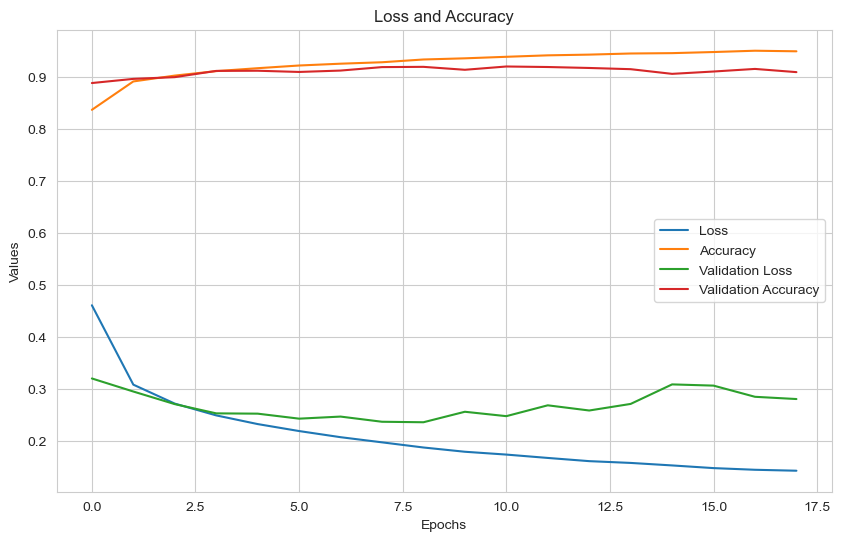

In [203]:


# Plot the DataFrame
summary.plot()

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Loss and Accuracy')
plt.legend(['Loss', 'Accuracy', 'Validation Loss', 'Validation Accuracy'])

# Show the plot
plt.show()


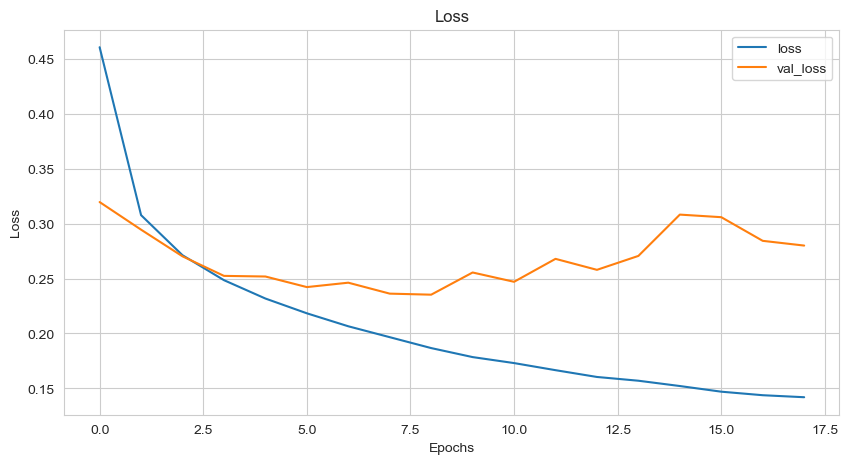

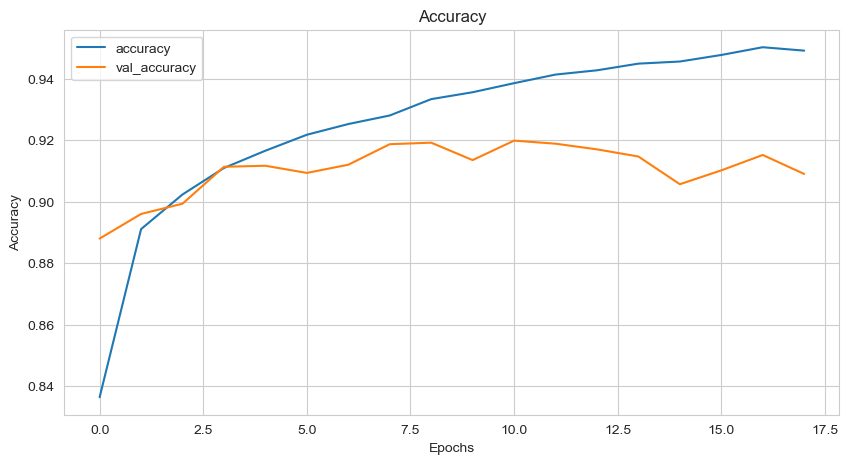

In [205]:



# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot loss
summary[['loss', 'val_loss']].plot(ax=ax)
ax.set_title('Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

# Create a new figure and axes for accuracy
fig, ax = plt.subplots(figsize=(10, 5))

# Plot accuracy
summary[['accuracy', 'val_accuracy']].plot(ax=ax)
ax.set_title('Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

plt.show()


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [206]:
score = model.evaluate(X_test, y_test , verbose=0)
print("Test loss:    ", score[0])
print("Test accuracy:", score[1])

Test loss:     0.26315218210220337
Test accuracy: 0.9118000268936157


In [213]:
pred_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [216]:
y_pred.shape

(10000,)

In [218]:
y_test.shape

(10000, 10)

In [221]:
# y_test is one-hot encoded with shape (10000, 10)
# Convert it to a 1D array with shape (10000,)
y_true = np.argmax(y_test, axis=1)

# Now we can use classification_report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.86      0.86      1000
           3       0.87      0.94      0.90      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.76      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [224]:
from sklearn.metrics import classification_report, confusion_matrix

conv_mat = confusion_matrix(y_true, y_pred)

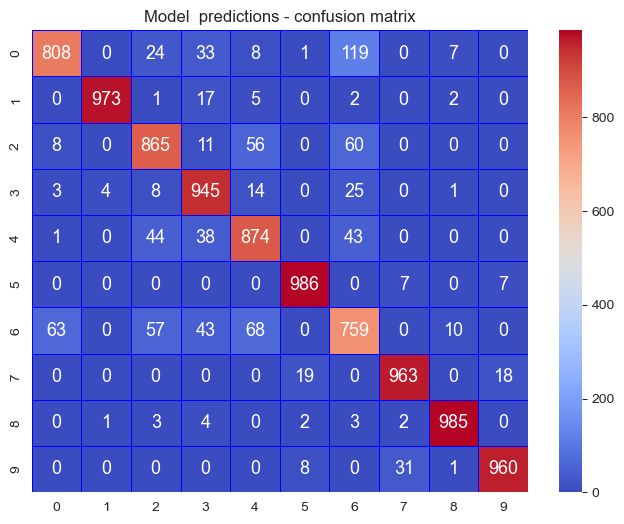

In [227]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    conv_mat,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='blue',
    fmt='g',
    annot_kws={"size": 13},
)
plt.title('Model  predictions - confusion matrix')
plt.show()


## Prediction

In [229]:
def plot_sample_with_prediction(model, x_test, y_test, classes, sample_index):
    sample = x_test[sample_index]
    sample = np.expand_dims(sample, 0)
    pred_prob = model.predict(sample)
    y_pred = np.argmax(pred_prob)
    y_true = np.argmax(y_true[sample_index])

    # Plot the sample image
    plt.figure(figsize=(4, 4))
    plt.imshow(sample[0])
    plt.title(f'Actual: {classes[y_true]}\nPredicted: {classes[y_pred]}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 33ms/step


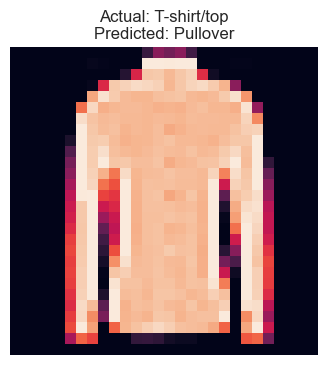

In [233]:
plot_sample_with_prediction(model, X_test, y_true, classes, 325)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___